In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import r2_score
from ml_utils import graph
from feature_selector import DimReducer
from file_loader import FileLoader

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

out_dir = '../../papi_output_opt/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/maciej/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Populating the interactive namespace from numpy and matplotlib


In [2]:
fl = FileLoader(['o6'], dim=[1,2])
X_train, X_test, y_train, y_test, df = fl.x, fl.x_test, fl.y, fl.y_test, fl.df

(8800, 16)
(8795, 1)
Train: (4414, 19)
Test:  (1884, 19)


In [3]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

model = build_model()
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0,
                    callbacks=[PrintDot(), keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])


......

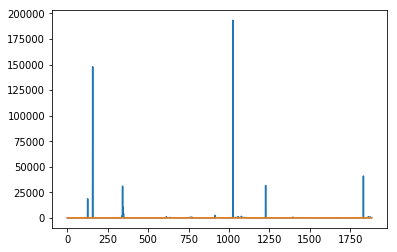

In [8]:
def plot_history(y_test, pred, model):
    plt.figure()
    plt.plot(pred)
    plt.plot(y_test)

pred = model.predict(X_test)
plot_history(y_test, pred, model)

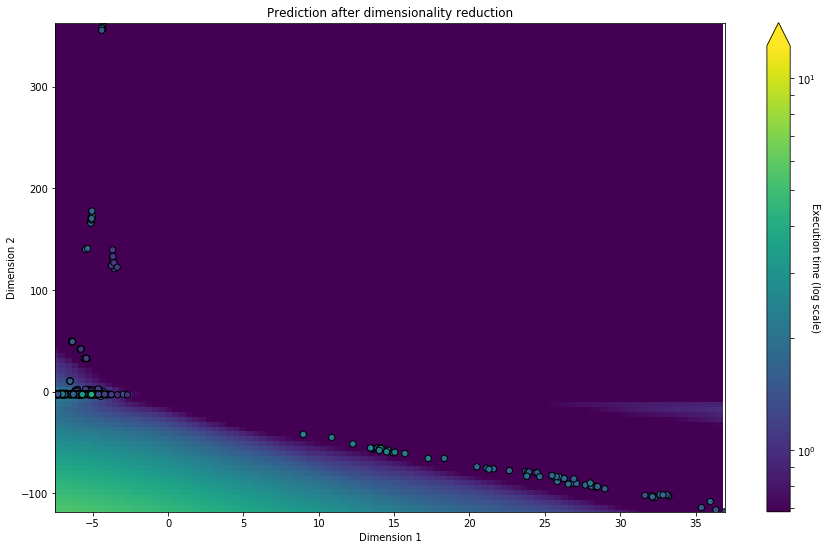

In [21]:
graph(model, X_train, y_train.flatten())

In [9]:
r2_score(y_test, pred)

-46173098.79355869